In [126]:
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as mplstyle

import seaborn as sns

import glob


In [127]:
plt.style.use('default')
sns.set_theme(context='paper', style='white', palette='viridis', font='serif',
            font_scale=2, color_codes=True, rc={'text.usetex' : True})
# mplstyle.use('fast')

In [128]:
DATA_PATH = "../output/"
FIG_PATH = "../figures/"


DATA_DIR = "Hetero_sin_relu_tanh_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50"
# DATA_DIR = "Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50"


In [129]:
run_dirs = glob.glob(DATA_PATH+ DATA_DIR + "/run*")

In [130]:
run_dirs

['../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_39',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_12',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_19',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_24',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_29',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_38',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_23',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_28',
 '../output/Homo_relu_1dmnist_probablistic_strat_adabelief_no_bias_min_10_5_5_10000_50_0.0001_runs_50/run_42',
 

In [131]:
neuron_history = [np.loadtxt(run_dir + "/neurons.txt") for run_dir in run_dirs]
accuracy_history = [np.loadtxt(run_dir + "/accuracy.txt") for run_dir in run_dirs]

In [132]:
first_removal_history = []
for neurons in neuron_history:
    diff = np.diff(neurons)
    try:
        index = np.where(diff < 0)[0][0] + 1
    except IndexError:
        index = np.nan
    first_removal_history.append(index)


In [133]:
non_removal_density = np.isnan(first_removal_history).sum()/len(first_removal_history)

In [134]:
non_removal_density

0.0

Text(0.5, 1.0, 'first neuron removal epoch')

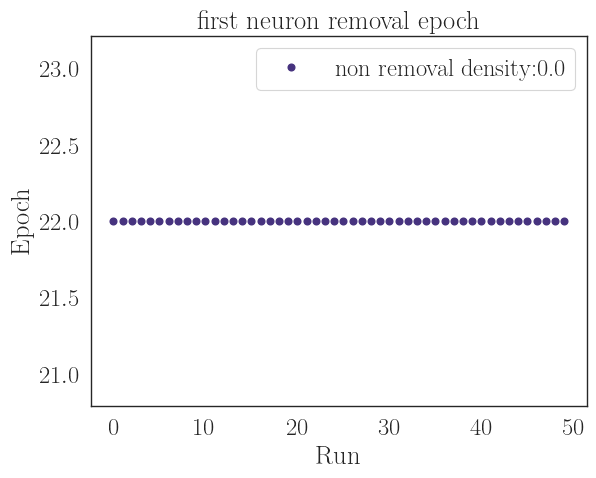

In [135]:
plt.plot(first_removal_history, "o", label=f"non removal density:{non_removal_density}")
plt.ylabel("Epoch")
plt.xlabel("Run")
plt.legend()
plt.title("first neuron removal epoch")


In [136]:
removal_history = np.loadtxt(DATA_PATH + DATA_DIR + "/first_removal_history.txt")

In [137]:
epoch, n_neurons, train_loss, test_loss =  removal_history.T

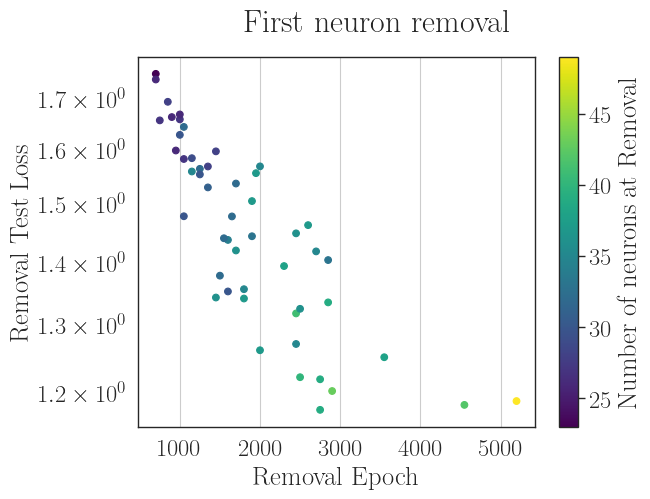

In [138]:
# fig = plt.figure(figsize=(10, 10))
plt.scatter(epoch, test_loss, c=n_neurons, cmap='viridis')
plt.xlabel('Removal Epoch')
plt.ylabel('Removal Test Loss')
plt.colorbar(label='Number of neurons at Removal')
plt.yscale('log')
plt.grid()
plt.suptitle('First neuron removal')
plt.savefig(FIG_PATH + DATA_DIR + "/first_removal.pdf")
plt.savefig(FIG_PATH + DATA_DIR + "/first_removal.svg", format='svg', bbox_inches='tight')
plt.show()

In [139]:
from scipy import stats 

first_removal_mode = stats.mode(first_removal_history, nan_policy= "omit")

In [140]:
first_removal_mode

ModeResult(mode=22, count=50)

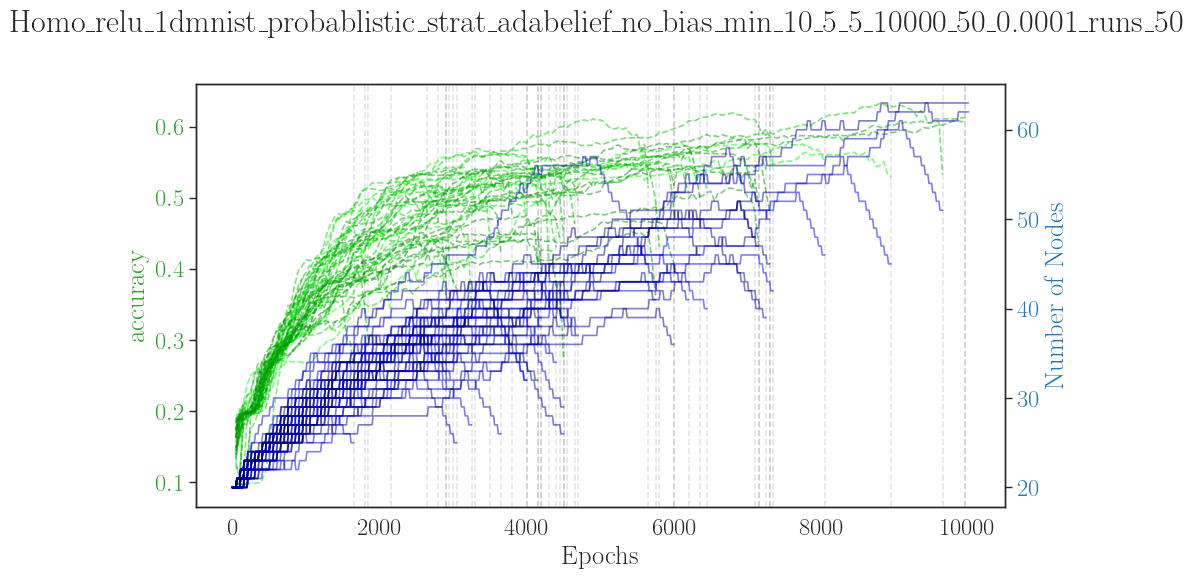

In [141]:
fig, ax1 = plt.subplots(figsize=(10, 6))

accuracy_color = 'tab:green'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy', color=accuracy_color)
ax1.tick_params(axis='y', labelcolor=accuracy_color)
# ax1.set_yscale("log")
# ax1.set_xscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

hue_loss = 0
hue_neuron = 2/3
hue_accuracy = 1/3
saturation = 1.0
value = 1.0

for i,_ in enumerate(accuracy_history):
    # test_epoch, test_loss = zip(*test_loss_history[i])
    test_accuracy_epoch, test_accuracy = zip(*accuracy_history[i])
    neuron_epoch, neurons = zip(*neuron_history[i])

    # Convert the hue, saturation, and value to RGB
    # loss_color = colors.hsv_to_rgb((hue_loss, saturation, value))
    neuron_color = colors.hsv_to_rgb((hue_neuron, saturation, value))
    accuracy_color = colors.hsv_to_rgb((hue_accuracy, saturation, value))

    ax1.plot(test_accuracy_epoch, test_accuracy, "--", color=accuracy_color, alpha=0.5)
    # ax1.plot(test_epoch, test_loss, "*", color=loss_color, alpha=0.5)
    ax2.plot(neuron_epoch, neurons, "-", color=neuron_color, alpha=0.5)

    # add dashed vertical lines at the last epoch of each run
    ax1.axvline(x=test_accuracy_epoch[-1], color="black", linestyle="--", alpha=0.1)
    # Update the hue for the next iteration
    # hue = (hue + 1.0 / len(train_loss_history)) % 1.0
    value = 1.0 - (i / len(neuron_history)) * 0.5 


plt.suptitle(DATA_DIR)
fig.tight_layout()
plt.savefig(FIG_PATH + DATA_DIR + "/neuron_accuracy.pdf")
plt.savefig(FIG_PATH + DATA_DIR + "/neuron_accuracy.svg", format='svg', bbox_inches='tight')

In [142]:
train_loss_history = [np.loadtxt(run_dir + "/train_loss.txt") for run_dir in run_dirs]
test_loss_history = [np.loadtxt(run_dir + "/test_loss.txt") for run_dir in run_dirs]

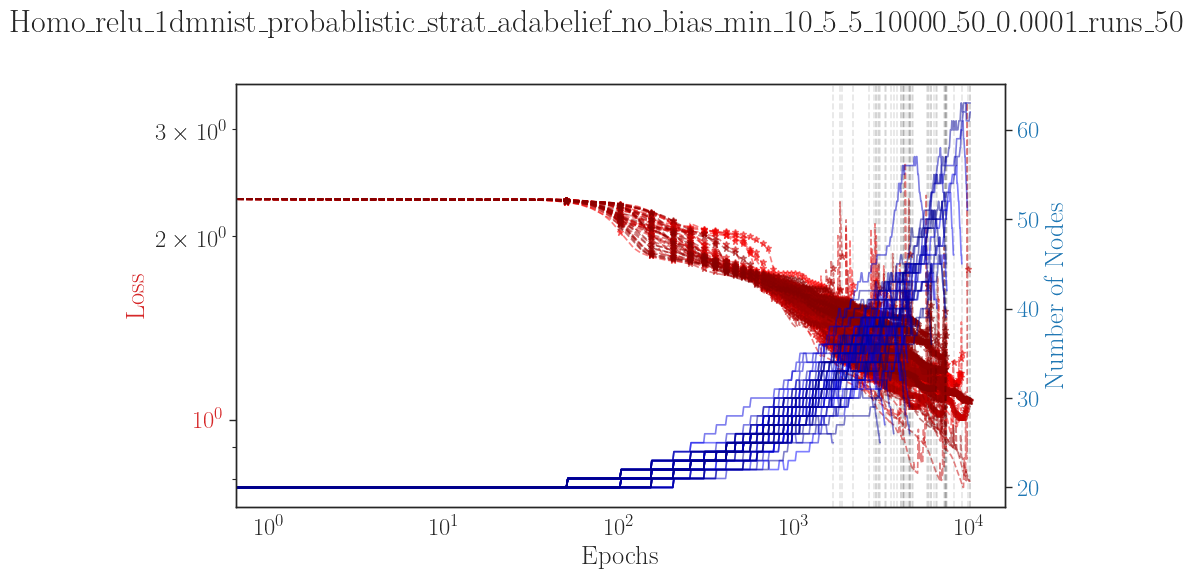

In [143]:
fig, ax1 = plt.subplots(figsize=(10, 6))

loss_color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=loss_color)
ax1.tick_params(axis='y', labelcolor=loss_color)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

hue_loss = 0
hue_neuron = 2/3
saturation = 1.0
value = 1.0

for i,_ in enumerate(train_loss_history):
    test_epoch, test_loss = zip(*test_loss_history[i])
    train_epoch, train_loss = zip(*train_loss_history[i])
    neuron_epoch, neurons = zip(*neuron_history[i])

    # Convert the hue, saturation, and value to RGB
    loss_color = colors.hsv_to_rgb((hue_loss, saturation, value))
    neuron_color = colors.hsv_to_rgb((hue_neuron, saturation, value))

    ax1.plot(train_epoch, train_loss, "--", color=loss_color, alpha=0.5)
    ax1.plot(test_epoch, test_loss, "*", color=loss_color, alpha=0.5)
    ax2.plot(neuron_epoch, neurons, "-", color=neuron_color, alpha=0.5)

    ax1.axvline(x=train_epoch[-1], color="black", linestyle="--", alpha=0.1)

    # Update the hue for the next iteration
    # hue = (hue + 1.0 / len(train_loss_history)) % 1.0
    value = 1.0 - (i / len(train_loss_history)) * 0.5 


plt.suptitle(DATA_DIR)
fig.tight_layout()
plt.savefig(FIG_PATH + DATA_DIR + "/neuron_loss.pdf")
plt.savefig(FIG_PATH + DATA_DIR + "/neuron_loss.svg", format='svg', bbox_inches='tight')

In [144]:
final_shape = [np.loadtxt(run_dir + "/final_shape.txt") for run_dir in run_dirs]
final_adjacency_matrix = [np.loadtxt(run_dir + "/final_adjacency_matrix.txt") for run_dir in run_dirs]

In [145]:
adj = final_adjacency_matrix[0]
shape = final_shape[0].astype(int)

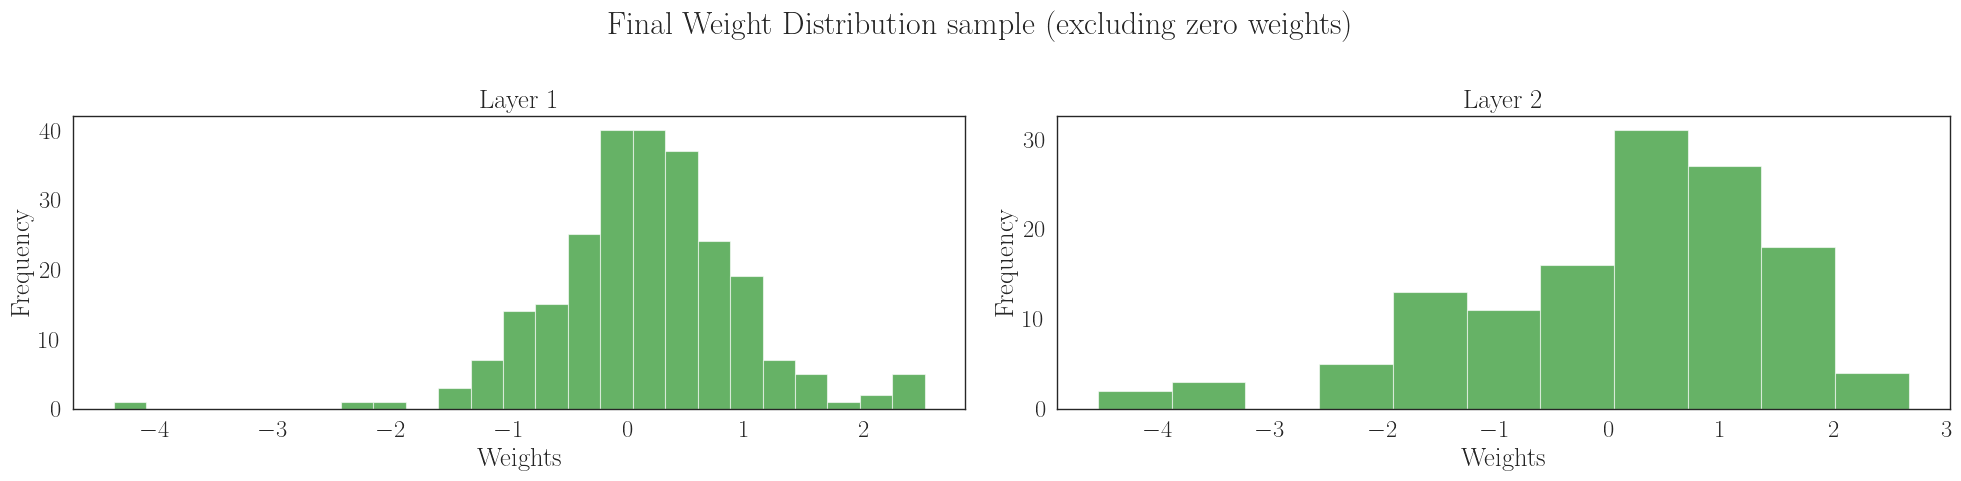

In [146]:
sub_matrices = np.split(adj, np.cumsum(shape)[:-1])[:-1]

fig, axs = plt.subplots(1, len(sub_matrices), figsize=(20, 5))

for i, (sub_matrix, ax) in enumerate(zip(sub_matrices, axs), start=1):
    weights = sub_matrix.flatten()
    weights = weights[weights != 0]
    ax.hist(weights, bins="auto", density=False, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution sample (excluding zero weights)')
plt.tight_layout()
plt.show()

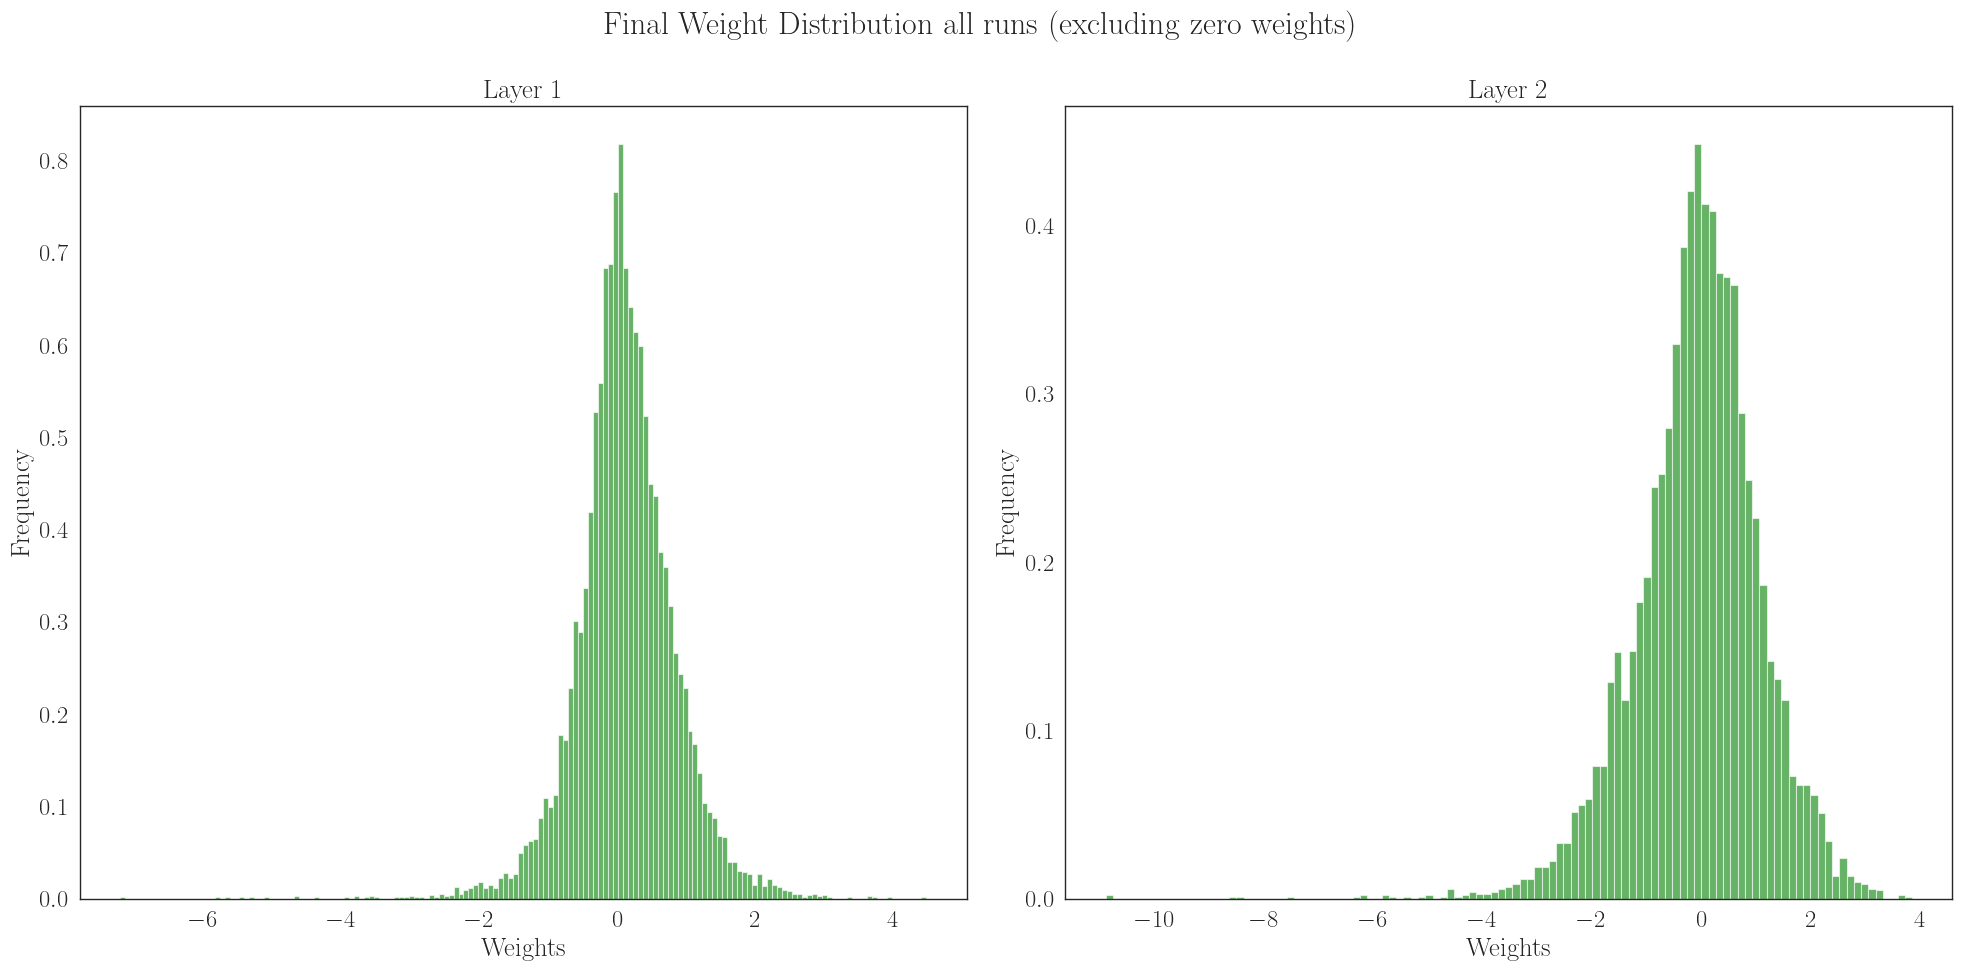

In [147]:
weights_by_layer = []

# For each adjacency matrix and its corresponding layer sizes
for adjacency_matrix, layer_sizes in zip(final_adjacency_matrix, final_shape):
    shape = layer_sizes.astype(int)
    # Split the adjacency matrix into sub-matrices
    sub_matrices = np.split(adjacency_matrix, np.cumsum(shape)[:-1])[:-1]

    # For each sub-matrix, add its flattened weights to the corresponding sublist in weights_by_layer
    for i, sub_matrix in enumerate(sub_matrices):
        # Flatten the sub-matrix and filter out the zeros
        weights = sub_matrix.flatten()
        weights = weights[weights != 0]

        if i >= len(weights_by_layer):
            # If the sublist does not exist yet, create it
            weights_by_layer.append(list(weights))
        else:
            # If the sublist already exists, append to it
            weights_by_layer[i].extend(weights)


# For each sublist in weights_by_layer, plot a histogram of the weights
fig, axs = plt.subplots(1, len(weights_by_layer), figsize=(20, 10))
for i, (weights, ax) in enumerate(zip(weights_by_layer, axs), start=1):
    ax.hist(weights, bins="auto", density=True, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution all runs (excluding zero weights)')
plt.tight_layout()
plt.savefig(FIG_PATH + DATA_DIR + "/final_combined_weight_distribution.pdf")
plt.savefig(FIG_PATH + DATA_DIR + "/final_combined_weight_distribution.svg", format='svg', bbox_inches='tight')
plt.show()

In [148]:
weights_by_layer

[[-0.41428881883621216,
  1.0535259246826172,
  -0.01771846041083336,
  0.4644995629787445,
  -0.16766467690467834,
  -0.6365107297897339,
  -0.4140976071357727,
  0.23725613951683044,
  -0.18051764369010925,
  -0.18175262212753296,
  0.8679885864257812,
  0.07971705496311188,
  -0.25265684723854065,
  0.2727283537387848,
  0.2286856472492218,
  0.23528943955898285,
  0.4544065296649933,
  0.14149315655231476,
  0.2730734944343567,
  0.7433449029922485,
  0.3157438039779663,
  -0.06841549277305603,
  -0.017018932849168777,
  0.24201898276805878,
  -2.309481620788574,
  -0.14270904660224915,
  0.9669144749641418,
  0.5416460633277893,
  0.5005133748054504,
  0.2538944184780121,
  -0.1238265112042427,
  0.06508386880159378,
  -0.007517452351748943,
  0.3174823820590973,
  0.7097898721694946,
  0.3893014192581177,
  0.18742920458316803,
  -0.2740630507469177,
  -0.4771547317504883,
  0.3335390090942383,
  0.08507658541202545,
  -0.057679418474435806,
  -0.18021716177463531,
  0.1254637539